<a href="https://colab.research.google.com/github/sancarhacer/MachineLearning/blob/main/10-KNNClassifierAndRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# bmi_score -> Body Mass Index (standardized)
# blood_pressure_variation -> Fluctuation in systolic blood pressure
# activity_level_index -> Daily activity level (from wearable data, normalized)
# high_risk_flag -> 1 = High health risk, 0 = Low risk
df = pd.read_csv("10-health_risk_classification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [3]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


In [4]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


<Axes: xlabel='bmi_score', ylabel='blood_pressure_variation'>

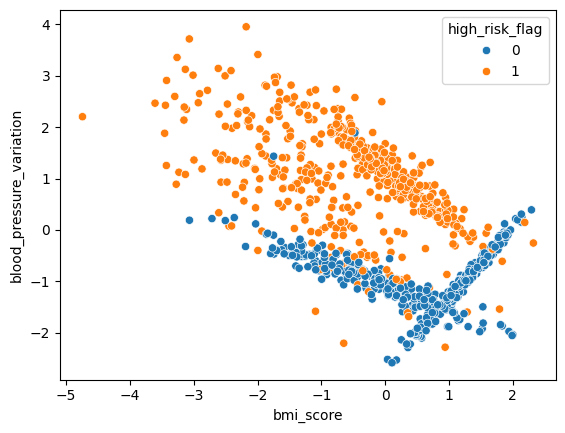

In [5]:
sns.scatterplot(data=df, x="bmi_score", y="blood_pressure_variation",hue="high_risk_flag")

<Axes: xlabel='activity_level_index', ylabel='blood_pressure_variation'>

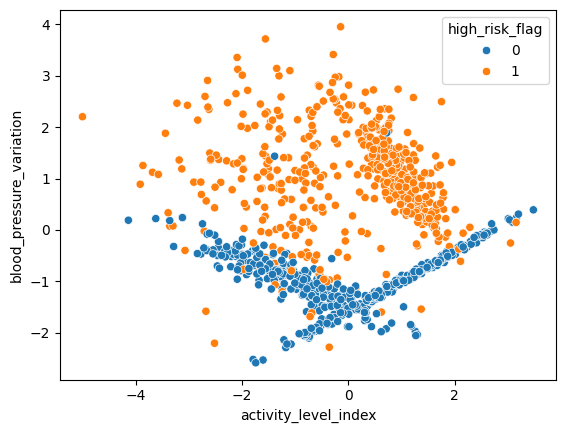

In [7]:
sns.scatterplot(data=df, x="activity_level_index", y="blood_pressure_variation",hue="high_risk_flag")

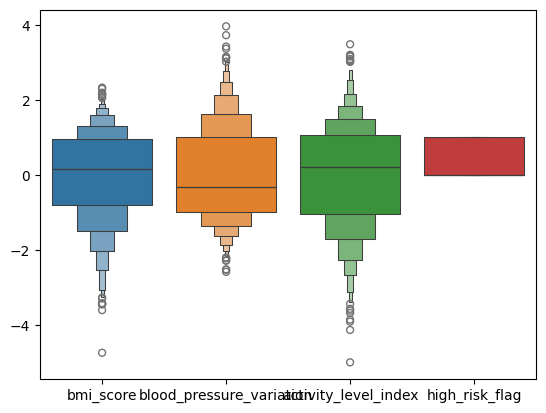

In [11]:
sns.boxenplot(df)
plt.show()

In [8]:
df['high_risk_flag'].value_counts()

,count
high_risk_flag,
0,502
1,498


In [9]:
X=df.drop('high_risk_flag',axis=1)
y=df['high_risk_flag']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)


In [12]:
# even though data is created for the training and seems scaled i will apply scaler so that
# you won't forget in real life
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [14]:
y_pred=classifier.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[124  10]
 [  2 114]]
accuracy score:  0.952
classification report:                precision    recall  f1-score   support

           0       0.98      0.93      0.95       134
           1       0.92      0.98      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [16]:
classifier=KNeighborsClassifier(n_neighbors=3,algorithm='auto')
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[125   9]
 [  1 115]]
accuracy score:  0.96
classification report:                precision    recall  f1-score   support

           0       0.99      0.93      0.96       134
           1       0.93      0.99      0.96       116

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [17]:
classifier=KNeighborsClassifier(n_neighbors=350,algorithm='auto')
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[124  17]
 [  2 107]]
accuracy score:  0.924
classification report:                precision    recall  f1-score   support

           0       0.98      0.88      0.93       141
           1       0.86      0.98      0.92       109

    accuracy                           0.92       250
   macro avg       0.92      0.93      0.92       250
weighted avg       0.93      0.92      0.92       250



In [18]:
# knn can be used for regression as well
df_reg = pd.read_csv("10-house_energy_regression.csv")
# avg_indoor_temp_change -> Change in indoor temperature over the past 24h (°C)
# outdoor_humidity_level -> Relative outdoor humidity (%)
# daily_energy_consumption_kwh -> Energy usage (in kWh) for the household over one day
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [19]:
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [20]:
df_reg.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


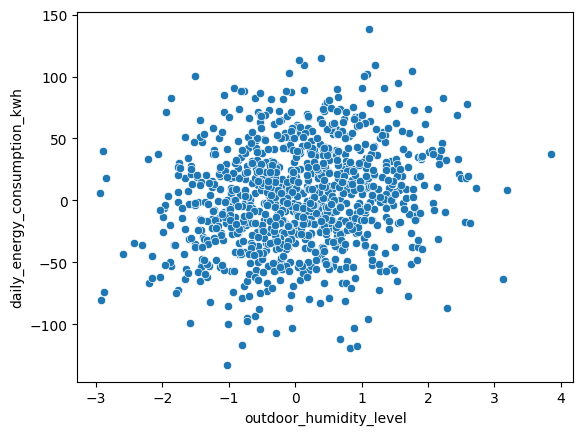

In [21]:
sns.scatterplot(x=df_reg['outdoor_humidity_level'],y=df_reg['daily_energy_consumption_kwh'])
plt.show()

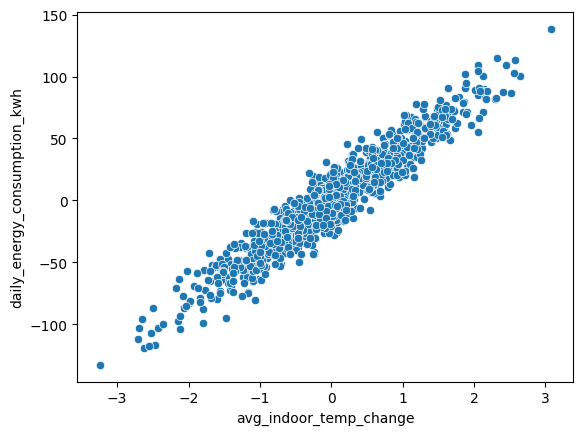

In [22]:
sns.scatterplot(x=df_reg['avg_indoor_temp_change'],y=df_reg['daily_energy_consumption_kwh'])
plt.show()

In [23]:
df_reg.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [24]:
X=df_reg.drop('daily_energy_consumption_kwh',axis=1)
y=df_reg['daily_energy_consumption_kwh']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [29]:
y_pred=regressor.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))

r2 score:  0.9152685146562609
mean absolute error:  9.42143518926242
mean squared error:  140.40201685069158


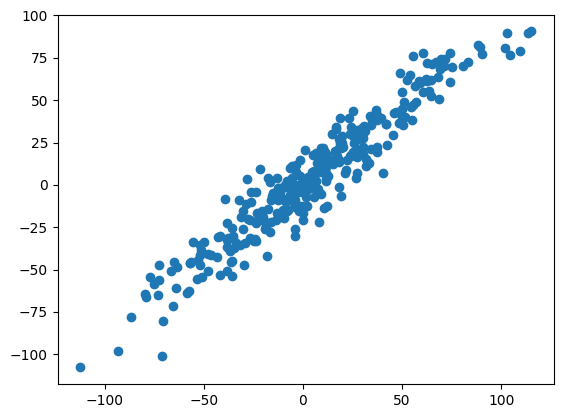

In [30]:
plt.scatter(y_test,y_pred)
plt.show()

In [31]:

# you can again test with different k values
regressor=KNeighborsRegressor(n_neighbors=7,algorithm='auto')
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=7)

r2 score:  0.9164863388635838
mean absolute error:  9.331428506491209
mean squared error:  138.3840541750219


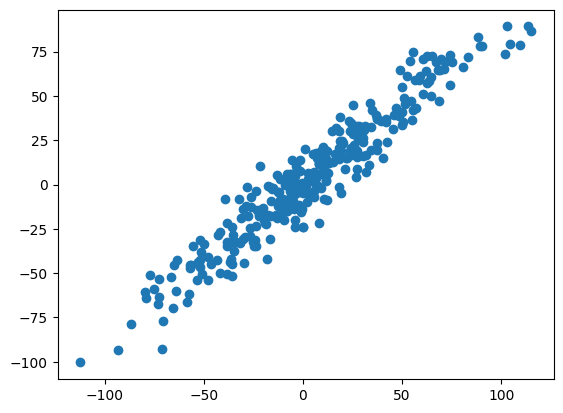

In [32]:
y_pred=regressor.predict(X_test_scaled)
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()